# Boston Housing


# 1. Introduction / Background

## 1.1. Data Selection

Boston housing dataset: https://www.kaggle.com/c/boston-housing/overview

 

## 1.2. Data description on Boston housing dataset

The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:
- crim: per capita crime rate by town.
- zn: proportion of residential land zoned for lots over 25,000 sq.ft.
- indus: proportion of non-retail business acres per town.
- chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- nox: nitrogen oxides concentration (parts per 10 million).
- rm: average number of rooms per dwelling.
- age: proportion of owner-occupied units built prior to 1940.
- dis: weighted mean of distances to five Boston employment centres.
- rad: index of accessibility to radial highways.
- tax: full-value property-tax rate per \$10,000.
- ptratio: pupil-teacher ratio by town.
- black:: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
- lstat: lower status of the population (percent).
- medv: median value of owner-occupied homes in $1000s.

**Sources**

Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## 1.3. Goal and objectives

Our goal is to develop a model that best predicts Boston housing price.

# 2. EDA

We evenly divided EDA responsibilities with each group member analyzing for 4 variables. Below describes a combined EDA from all group members.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#Display for notebooks
%matplotlib inline

In [2]:
#Load the Boston housing dataset
data = pd.read_csv ( 'boston_data_1.csv' )
#Note that 'medv' been multiplicatively scaled to account for 35 years of market inflation
prices = data [ 'medv' ]
features = data.drop ( 'medv', axis = 1 )
    
#Confirm Success
print ( "Boston housing dataset has {} data points with {} variables each".format ( * data.shape ) )

Boston housing dataset has 404 data points with 14 variables each


In [3]:
#Obtain general info on dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
crim       404 non-null float64
zn         404 non-null float64
indus      404 non-null float64
chas       404 non-null float64
nox        404 non-null float64
rm         404 non-null float64
age        404 non-null float64
dis        404 non-null float64
rad        404 non-null float64
tax        404 non-null float64
ptratio    404 non-null float64
black      404 non-null float64
lstat      404 non-null float64
medv       404 non-null float64
dtypes: float64(14)
memory usage: 44.3 KB


In [4]:
#Look at first few rows of dataframe
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


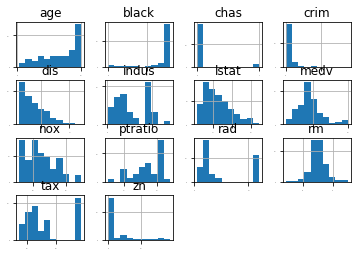

In [5]:
#Histographs for each variable
data.hist ( sharex = False, sharey = False, xlabelsize = 1, ylabelsize = 1 )
plt.show()

#### Interpretation

chas, crim, dis, zn, lsat: Appears to be right skewed

age, black, ptratio: Appears to be left skewed

medv, rm appear to have normal distributions

## 2.1. Variable crim

In [6]:
# ********************* *************** #
#   Learn more on the variable "crim"
# ************************************* #
# what are the basic statistics
data["crim"].describe()

count    404.000000
mean       3.730912
std        8.943922
min        0.006320
25%        0.082382
50%        0.253715
75%        4.053158
max       88.976200
Name: crim, dtype: float64

#### Interpretation

Median value is much smaller than the mean; but the max is much larger the 75%ile, suggesting there are likely some outliers in this variable as well.

Let's plot the histogram and boxplot for this variable.

In [7]:
def eda_numeric_plt(variable, y_max=-99, y_label=''):
    fig = plt.figure(figsize=(12,4))
    ax = fig.add_subplot(1,2,1)
    ax.hist(data[variable],50, color='lightblue', edgecolor='k')
    ax.set_xlabel(variable, fontsize=14)
    ax.set_ylabel("Counts", fontsize=14)
    ax.tick_params(labelsize=14)
    ax.set_title('Distribution of {}'.format(variable), fontsize=14)

    ax = fig.add_subplot(1,2,2)
    ax.boxplot(data[variable], widths=0.3)
    # if no value is provided, we skip next line
    if y_max != -99:
        ax.set_ylim([-1, y_max])
    ax.set_ylabel(y_label, fontsize=14)
    ax.tick_params(labelsize=14)
    ax.set_title('Boxplot', fontsize=16)
    plt.rcParams['axes.linewidth'] = 1
    plt.setp(ax.spines.values(), color='k')


    plt.show()
    plt.close()

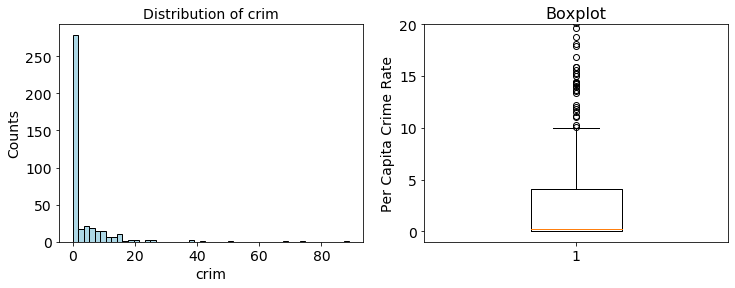

In [8]:
eda_numeric_plt(variable='crim', y_max=20, y_label='Per Capita Crime Rate')

#### Interpretation

This variable is very right-skewed. Not sure how relistic to have a 88 in the per capita crime rate. Maybe worth to further to investigate the rows with large per captica values.

In [9]:
ia = np.where(data.crim>20)[0]
data.iloc[ia]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
10,25.9406,0.0,18.1,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64,10.4
34,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
50,23.6482,0.0,18.1,0.0,0.671,6.380,96.2,1.3861,24.0,666.0,20.2,396.90,23.69,13.1
114,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
116,41.5292,0.0,18.1,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38,8.5
143,24.3938,0.0,18.1,0.0,0.700,4.652,100.0,1.4672,24.0,666.0,20.2,396.90,28.28,10.5
167,20.0849,0.0,18.1,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63,8.8
177,20.7162,0.0,18.1,0.0,0.659,4.138,100.0,1.1781,24.0,666.0,20.2,370.22,23.34,11.9
273,37.6619,0.0,18.1,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52,10.9
285,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8


For the values with extremely high crime rate, the proportion of the residential land over a 25000 sqft is all 0 and the age of the building is old (~80 or older).

## 2.2 Variable zn

In [10]:
# ********************* *************** #
#   "zn": proportion of residential 
# land zoned for lots over 25,000 sq.ft.
# ************************************* #
data["zn"].describe()

count    404.000000
mean      10.509901
std       22.053733
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max       95.000000
Name: zn, dtype: float64

#### Interpretation

Basic statistics of "zn" seem to show that "zn" is zero for the 50%ile and lower. It is likely to be right skewed.

Let's plot the histogram and boxplot.

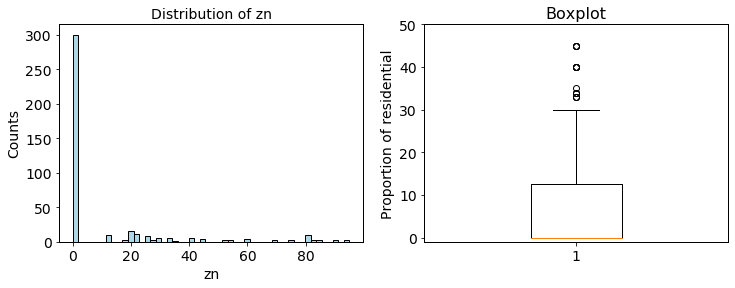

In [11]:
eda_numeric_plt(variable='zn',y_max=50, y_label='Proportion of residential')

#### Interpretation

Indeed. This variable is right skewed. Since many values are 0, suggesting there are few houses with lot size > 25000.

## 2.3. Variable indus

In [12]:
# ********************* *************** #
#   "indus": proportion of non-retail 
# . business acres per town
# ************************************* #
data["indus"].describe()

count    404.000000
mean      11.189901
std        6.814909
min        0.460000
25%        5.190000
50%        9.795000
75%       18.100000
max       27.740000
Name: indus, dtype: float64

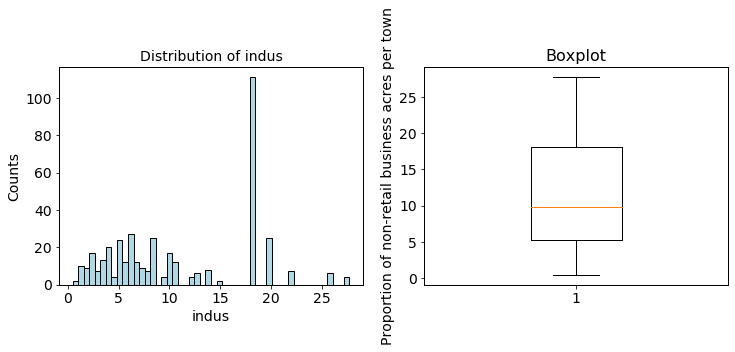

In [13]:
eda_numeric_plt(variable='indus',y_label='Proportion of non-retail business acres per town')

## 2.4. Variable chas

In [14]:
# ********************* *************** #
#   "chas": Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# ************************************* #
# find out how many 0s and 1s
ia=np.where(data['chas']== 1)
print("counts of \'chas==1\' are: ", len(ia[0]))

counts of 'chas==1' are:  28


#### Interpretation

Only 28 housing is close to the charles river in this dataset.

## 2.5. Variable nox

In [15]:
# ********************* *************** #
#   "nox": nitrogen oxides concentration (parts per 10 million).
# ************************************* #
data['nox'].describe()

count    404.000000
mean       0.556710
std        0.117321
min        0.392000
25%        0.453000
50%        0.538000
75%        0.631000
max        0.871000
Name: nox, dtype: float64

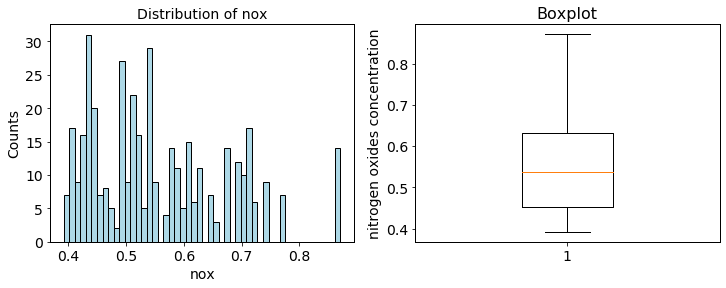

In [16]:
eda_numeric_plt(variable='nox',y_label='nitrogen oxides concentration')

#### Interpretation

"The national ambient air quality standard for
NO2 is 50 parts per billion (ppb) (or 0.05 parts per
million [ppm]) averaged over 1 year. Maximum
30-minute and 24-hour outdoor values of NO2 can
be 0.45 ppm and 0.21 ppm, respectively. In homes
with gas stoves, 15 to 25 ppb are added to the
usual background level of NO2 .' The normal level
for such homes ranges from 25 to 75 ppb." -- https://www.jacionline.org/article/S0091-6749(54)00063-2/pdf

the dataset's value doesn't really match the article I have found, but we know higher value of nox is worse

## 2.6. Variable rm

In [17]:
# ********************* *************** #
#   "rm": average number of rooms per dwelling.
# ************************************* #
data['rm'].describe()

count    404.00000
mean       6.30145
std        0.67583
min        3.56100
25%        5.90275
50%        6.23050
75%        6.62925
max        8.78000
Name: rm, dtype: float64

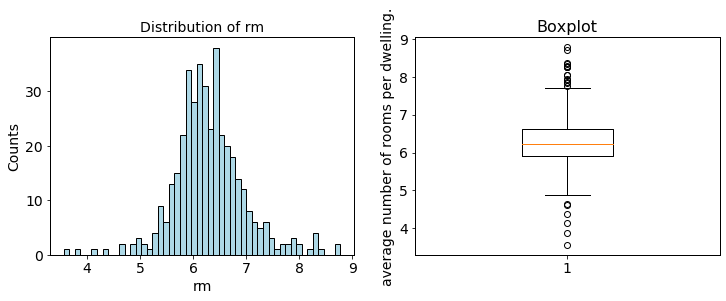

In [18]:
eda_numeric_plt(variable='rm',y_label='average number of rooms per dwelling.')

#### Interpretation

most houses of this dataset has around 5~7 rooms

## 2.7. Variable age

In [19]:
# ********************* *************** #
#   "age": proportion of owner-occupied units built prior to 1940.
# ************************************* #
data['age'].describe()

count    404.000000
mean      68.601733
std       28.066143
min        2.900000
25%       45.800000
50%       76.600000
75%       94.150000
max      100.000000
Name: age, dtype: float64

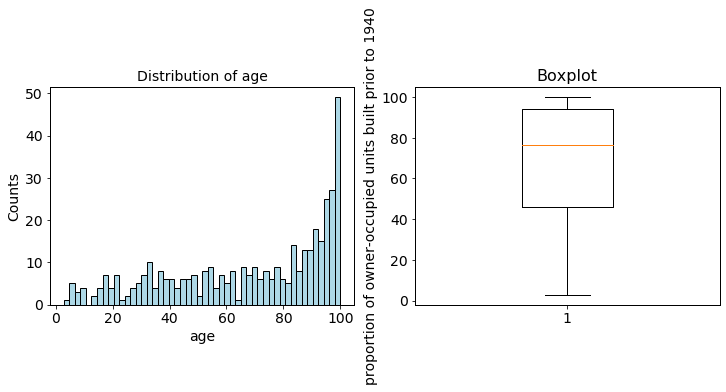

In [20]:
eda_numeric_plt(variable='age',y_label='proportion of owner-occupied units built prior to 1940')

#### Interpretation

the higher this number is the older it is, looks like a lot of building were built prior to 1940, the data was collected at 1978, so it does make sense

## 2.8. Variable dis

In [21]:
# ********************* *************** #
#   "dis": weighted mean of distances to five Boston employment centres.
# ************************************* # 
data['dis'].describe()

count    404.000000
mean       3.799666
std        2.109916
min        1.169100
25%        2.087875
50%        3.207450
75%        5.222125
max       12.126500
Name: dis, dtype: float64

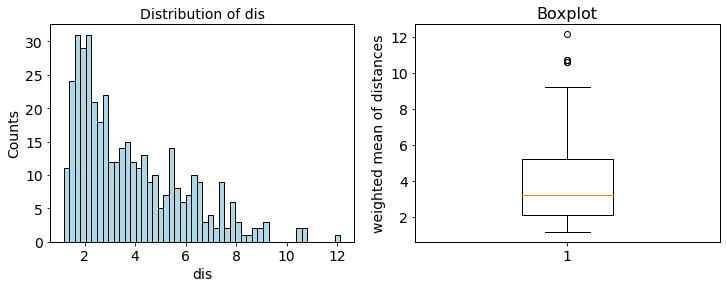

In [22]:
eda_numeric_plt(variable='dis',y_label='weighted mean of distances')

#### Interpretation

looks like most of building is pretty close to the employment centres, and it makes sense, because city has a higher density of the population than suburban.

### 2.9. Variable rad

In [23]:
# ********************* *************** #
#   "rad": index of accessibility to radial highways.
# ************************************* # 
data['rad'].describe()

count    404.000000
mean       9.836634
std        8.834741
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: rad, dtype: float64

#### Interpretation

Above, we see there are 404 observations with an arithmetic mean of 9.8. The standard deviation is 8.83. The rad values range from 1 to 24. The lowest observation (minimum) is 1. The highest observation (maximum) is 24. 25% of the rad values are between 1 and 4 (Q1). The median is 5 (Q2). We note that the median is lower than the mean, suggesting data may not be normally distributed. 50% of the price values are below 5 (but no lower than 1) and 50% of the price values are above 5 (but not higher than 24; Q3). 75% of the price values are between 1 and 24 (Q4).

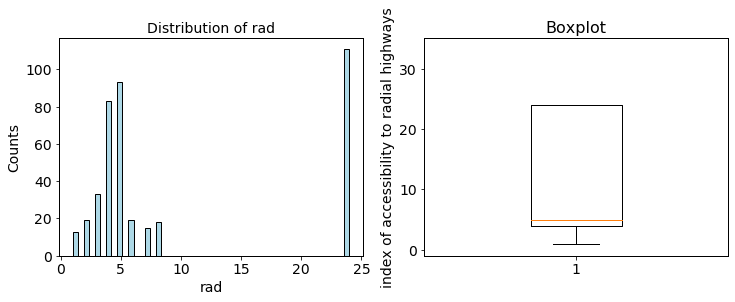

In [24]:
eda_numeric_plt(variable='rad',y_label='index of accessibility to radial highways',y_max=35)

## 2.10. Variable tax

In [25]:
# ********************* *************** #
#   "tax": full-value property-tax rate per $10,000.
# ************************************* # 
data['tax'].describe()

count    404.000000
mean     411.688119
std      171.073553
min      187.000000
25%      281.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64

#### Interpretation

Above, we see there are 404 observations with an arithmetic mean of 411. The standard deviation is 171.07. The tax values range from 187 to 711 (note that this is a large range of values). The lowest observation (minimum) is 187. The highest observation (maximum) is 711. 25% of the rad values are between 187 and 281 (Q1). The median is 330 (Q2). We note that the median is lower than the mean, suggesting data may not be normally distributed. 50% of the price values are below 330 (but no lower than 187) and 50% of the price values are above 330 (but not higher than 711; Q3). 75% of the price values are between 187 and 666 (Q4).

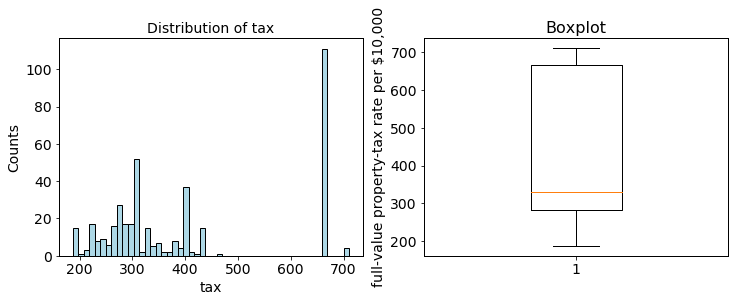

In [26]:
eda_numeric_plt(variable='tax',y_label='full-value property-tax rate per $10,000')

## 2.11. Variable ptratio

In [27]:
# ********************* *************** #
#   "ptratio": pupil-teacher ratio by town.
# ************************************* # 
data['ptratio'].describe()

count    404.000000
mean      18.444554
std        2.150295
min       12.600000
25%       17.375000
50%       19.000000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64

#### Interpretation

Above, we see there are 404 observations with an arithmetic mean of 18.44. The standard deviation is 2.15. The ptratio values range from 12.6 to 22. The lowest observation (minimum) is 12.6. The highest observation (maximum) is 22. 25% of the rad values are between 12.6 and 17.375 (Q1). The median is 19 (Q2). We note that the median is relatively close to the mean, suggesting that the data is normally distributed. 50% of the price values are below 19 (but no lower than 17.375) and 50% of the price values are above 19 (but not higher than 22; Q3). 75% of the price values are between 12.6 and 22 (Q4).

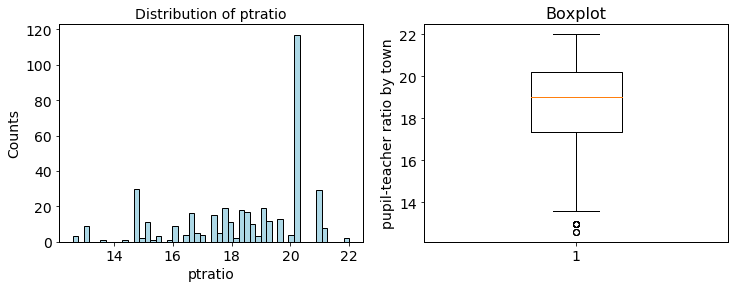

In [28]:
eda_numeric_plt(variable='ptratio',y_label='pupil-teacher ratio by town')

## 2.12. Variable black

In [29]:
# ********************* *************** #
#   "black": 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
# ************************************* # 
data['black'].describe()

count    404.000000
mean     355.068243
std       94.489572
min        0.320000
25%      374.710000
50%      391.065000
75%      396.007500
max      396.900000
Name: black, dtype: float64

#### Interpretation

Above, we see there are 404 observations with an arithmetic mean of 355.07. The standard deviation is 94.49. The black values range from 0.32 to 396.90 (a very large range). The lowest observation (minimum) is 0.32. The highest observation (maximum) is 396.9. 25% of the rad values are between 0.32 and 374.71 (Q1; Note the huge range here). The median is 391.07 (Q2). We note that the median is higher than the mean, suggesting data may not be normally distributed. 50% of the price values are below 391.07 (but no lower than 0.32) and 50% of the price values are above 391.07 (but not higher than 396.9; Q3). 75% of the price values are between 0.32 and 396 (Q4).

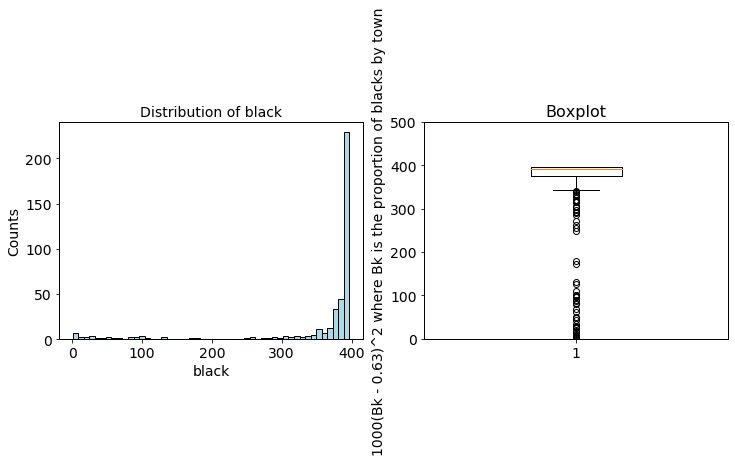

In [30]:
eda_numeric_plt(variable='black',y_label='1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',y_max=500)

## 2.13. Variable lstat

In [31]:
# ********************* *************** #
#   "lstat": lower status of the population (percent).
# ************************************* # 
data["lstat"].describe()

count    404.000000
mean      12.598936
std        6.925173
min        1.730000
25%        7.135000
50%       11.265000
75%       16.910000
max       34.370000
Name: lstat, dtype: float64

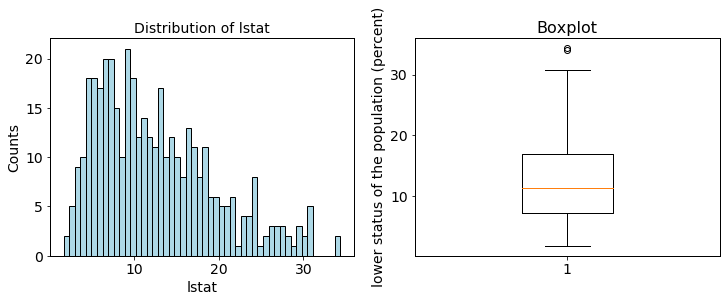

In [32]:
eda_numeric_plt(variable='lstat',y_label='lower status of the population (percent)')

## 2.14. Variable medv

In [33]:
data["medv"].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

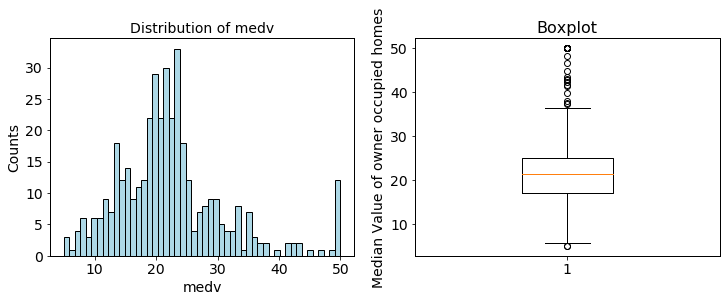

In [34]:
eda_numeric_plt(variable='medv',y_label='Median Value of owner occupied homes')

#### Interpretation 
The distribution of median values of owner occupied homes are slightly right skewed with mean larger than median values.


## 2.14. Explore correlations between variables

In [35]:
def correlations(data, y, xs):
    rs = []
    rhos = []
    for x in xs:
        r = stats.pearsonr(data[y], data[x])[0]
        rs.append(r)
        rho = stats.spearmanr(data[y], data[x])[0]
        rhos.append(rho)
    return pd.DataFrame({"feature": xs, "r": rs, "rho": rhos})

variables = list(data.columns) 

for i, var_i in enumerate(variables):
    if i< len(variables)-1:
        print("correlations with %s" % var_i)
        print(correlations(data, var_i, variables[i+1:]))
    print("\n\n")

correlations with crim
    feature         r       rho
0        zn -0.194770 -0.552142
1     indus  0.404249  0.740333
2      chas -0.060688  0.042912
3       nox  0.405290  0.811619
4        rm -0.172226 -0.269534
5       age  0.349288  0.699253
6       dis -0.376493 -0.740802
7       rad  0.603044  0.740088
8       tax  0.565047  0.721795
9   ptratio  0.292092  0.468879
10    black -0.377436 -0.393906
11    lstat  0.428940  0.636931
12     medv -0.400956 -0.584999



correlations with zn
    feature         r       rho
0     indus -0.532268 -0.637018
1      chas -0.037290 -0.047635
2       nox -0.497114 -0.624603
3        rm  0.302404  0.349302
4       age -0.546587 -0.519148
5       dis  0.659018  0.608352
6       rad -0.311313 -0.268042
7       tax -0.289332 -0.323713
8   ptratio -0.371315 -0.423871
9     black  0.176350  0.185130
10    lstat -0.412075 -0.478700
11     medv  0.355608  0.435495



correlations with indus
    feature         r       rho
0      chas  0.059928  0.09152

#### Interpretation

From correlation analyses, result show that, "crim" (crime rate) is anti-correlated with "zn" (proportion of residential areas in a 25,000, and positively correlated with "indus" (the proportion of the non-retail business acres). In addition, there is a negative correlation between "zn" and "indus".

When we build our predition model, we have to keep the collinearity between variables, so that we don't include variables with strong correlations as our predictors.

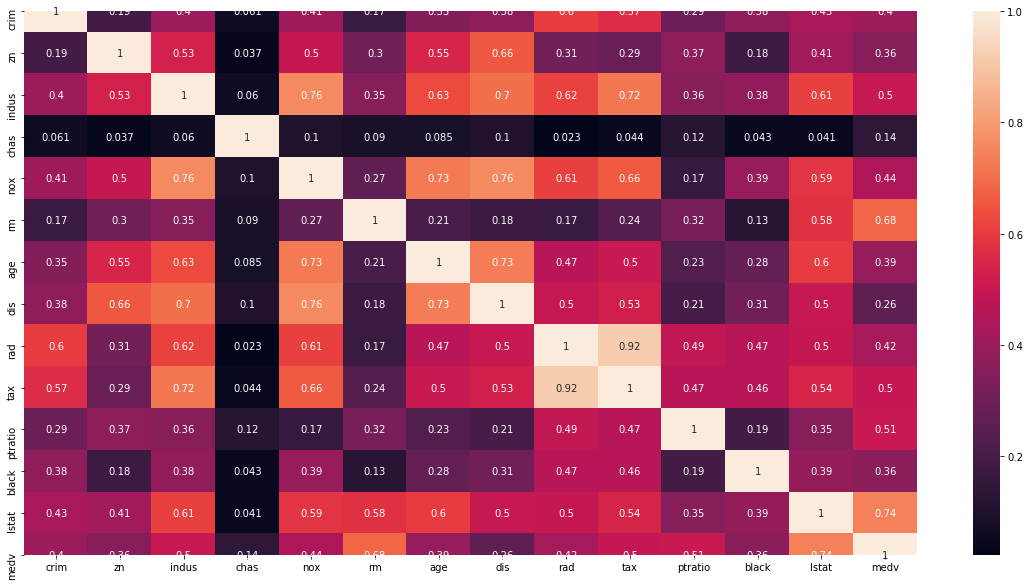

In [36]:
#Heat map
plt.figure ( figsize = ( 20, 10 ) )
sns.heatmap ( data.corr().abs(),  annot = True )

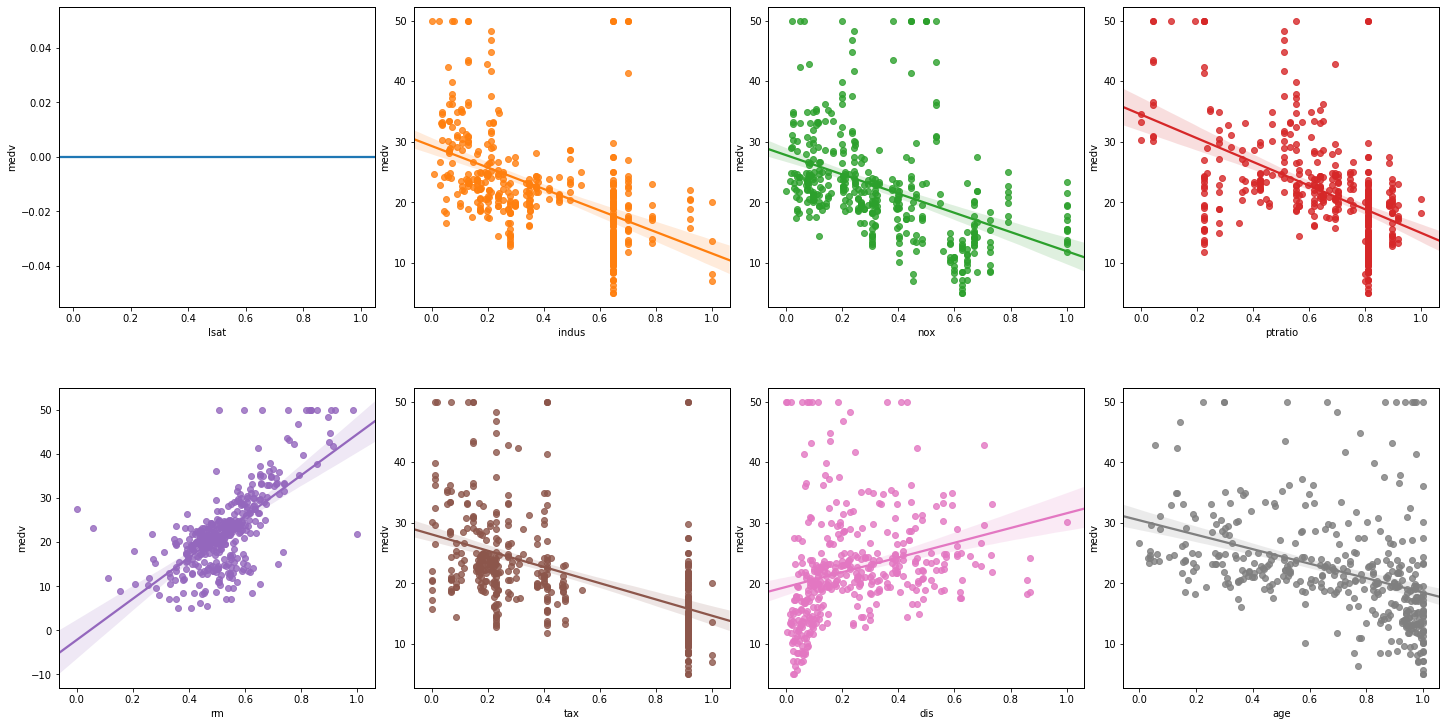

In [37]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
#Let's scale the columns before plotting them against medv
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = [ 'lsat', 'indus', 'nox', 'ptratio', 'rm', 'tax', 'dis', 'age' ]
x = data.loc[:,column_sels]
y = data[ 'medv' ]
x = pd.DataFrame ( data = min_max_scaler.fit_transform(x), columns = column_sels )
fig, axs = plt.subplots ( ncols = 4, nrows = 2, figsize = ( 20, 10 ) )
index = 0
axs = axs.flatten()
for i, k in enumerate ( column_sels ):
    sns.regplot ( y = y, x = x [ k ], ax = axs[ i ] )
plt.tight_layout ( pad = 0.4, w_pad = 0.5, h_pad = 5.0 )

#### Interpretation

Based on the results above, we may try predict medv with 'lsat', 'indus', 'nox', 'ptratio', 'rm', 'tax', 'dis', 'age' features. 

Intuitively we can infer the following
- An increase in the value of `'rm'` might result in an increase in the value of `'medv'`, since more rooms indicate bigger home size thus can accommodate more people.
- An increase in the value of `'lsat'`, might result in an decrease in the value of `'medv'`, since low income people tend to have a low purchasing power.
- An increase in the value of `'ptratio'`, might result in an increase in the value of `'medv'`, because a low `'ptratio'` can indicate better education for the children in the town.
    
From the correlations figures shown above, we can infer the following:
- An increase in the value of `'rm'` will result in an increase in the value of `'medv'`, since they have a positive correlation.
- An increase in the value of `'lsat'`, w result in an decrease in the value of `'medv'`, since they have a negative correlation.

# 3. Model development and evaluation

In this section, each of us have build several models. We chose to select 3 final linear regression models and a decision tree regression model for our final report. We will use Bayesian inference to assess which one performs the best.


## 3.1 Linear Model 1

#### Some initial thoughts and plans

From the first round of EDA analysis, we have looked at some basic statistics from individual variables in our datasets. We plotted their histograms and looked at their correlations.

We have found collinearity between many variables in this dataset.

The first model started with building a linear model using variables having strong correlations with the target variable ("medv": median value of owner-occupied homes in $1000s), but avoiding using variables with strong correlations with each other. 

Variables with strong correlation with the targe variable (r>0.5) are: indus, nox, rm, rad, tax, lstat.  Since indus and nox are strongly correlated (r= 0.76), we only used indus (indus and medv have a stronger correlation). Similary, indus also have strong correlation with tax and lstat. We chose to use lstat since it has the highest correlation with medv. Thus, this model started with "rm, rad, lstat" as predictors of "medv".

From the first several runs of model development and evaluations of residuals, we found that we had to transform some data variables.


In [38]:
# data transformation

# divide rad into two categories < 15 & > 15
data['rad_lt_15'] = data.rad.apply(lambda x: 1 if x<15 else 0)

# convert lstat to a log scale
data['lstat_log'] = np.log(data.lstat)

data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,rad_lt_15,lstat_log
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7,1,2.290513
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6,1,2.221375
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3,1,2.299581
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4,1,3.065725
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5,1,2.243896


In [39]:
import models

# build the second linear model
model = " medv ~ rm + rad_lt_15 + lstat_log"
result = models.bootstrap_linear_regression(model, data=data)
models.describe_bootstrap_lr(result)

#### Interpretation

With the this model, results show an R2 of 0.71. Now, we considered using cross validation to build more bootstrap ensembles of R2.

### Cross validation

In [40]:
import random
import patsy

def chunk(xs, n):
    k, m = divmod(len(xs), n)
    return [xs[i * k + min(i, m):(i + 1) * k + min(i + 1, m)] for i in range(n)]

def cross_validation(algorithm, formula, data, evaluate, fold_count=10, repetitions=3):
    indices = list(range(len( data)))
    metrics = []
    for _ in range(repetitions):
        random.shuffle(indices)
        folds = chunk(indices, fold_count)
        for fold in folds:
            test_data = data.iloc[fold]
            train_indices = [idx not in fold for idx in indices]
            train_data = data.iloc[train_indices]
            result = algorithm(formula, data=train_data)
            model = result["model"]
            y, X = patsy.dmatrices(formula, test_data, return_type="matrix")
            # y = np.ravel( y) # might need for logistic regression
            results = models.summarize(formula, X, y, model)
            metric = evaluate(results)
            metrics.append(metric)
    return metrics


lr_result_1 = cross_validation(models.linear_regression, model, data, lambda r: (r["sigma"], r["r_squared"]))
print(r"95% CI for R^2:", stats.mstats.mquantiles([r[1] for r in lr_result_1], [0.025, 0.975]))

95% CI for R^2: [0.37879442 0.82624228]


#### Intepretation
We divided data into 10 chunks. We repeat our analysis with 3 runs and came out with 30 independent estimates of R2 for this model.

Result suggest the R2 of this model is between 0.47 and 0.85 at a 95% confidence interval.



## 3.2 Linear Model 2

Linear model 2 was contributed by a different group member compared to the linear model 1. 
We now considered a few more different variables. Note that we expect a better fit to our predictor "medv" with more variables. But we did not consider calculating an adjusted R2 for this exercise.

In [41]:
# data transformation
data["log_dis"] = data["dis"].apply(np.log)
data["log_crim"] = data["crim"].apply(np.log)
data["sqrt_lstat"] = data["lstat"].apply(np.sqrt)

In [42]:
model2 = "medv ~ rm + sqrt_lstat + ptratio + log_dis + log_crim" 
result2 = models.bootstrap_linear_regression(model2, data=data)
models.describe_bootstrap_lr(result2)

#### Interpretation

Linear model 2 seem to show a higher R2. Now, let's run cross validation.

#### Cross validation

In [43]:
lr_result_2 = cross_validation(models.linear_regression, model2, data, lambda r: (r["sigma"], r["r_squared"]))
print(r"95% CI for R^2:", stats.mstats.mquantiles([r[1] for r in lr_result_2], [0.025, 0.975]))

95% CI for R^2: [0.36708378 0.86339239]


#### More interpretation
From bootstrap ensemble R2 results, they suggest the 95% confidence interval for linear model 2 is between 0.42 and 0.86.


## 3.3 Linear Model 3

Linear model 3 originated from one group member different from models 1 and 2. This model took consideration of a different suite of variables.

In [44]:
model3 = "medv ~ black + tax + dis + lstat_log + ptratio + rm"
results = models.linear_regression(model3, data)
models.simple_describe_lr(results)

#### Cross validation

In [45]:
lr_result_3 = cross_validation(models.linear_regression, model3, data, lambda r: (r["sigma"], r["r_squared"]))
print(r"95% CI for R^2:", stats.mstats.mquantiles([r[1] for r in lr_result_3], [0.025, 0.975]))

95% CI for R^2: [0.5354853  0.90574466]


#### More interpretation
The 95% confidence interval for model 3 is between 0.58 and 0.86. 

## 3.4 Decision Tree Regression

In this method, we first use a validation curve to assess how many tree depths we need to consider.

### Validation curve

In [46]:
# build a cross validation curve for decision tree 
def decisiontree_cross_validation(formula, builder, data, fold_count=10, repetitions=3):
    indices = list(range(len( data)))
    metrics = {"train": [], "test": []}
    for _ in range(repetitions):
        random.shuffle(indices)
        folds = chunk(indices, fold_count)
        for fold in folds:
            test_data = data.iloc[fold]
            train_indices = [idx not in fold for idx in indices]
            train_data = data.iloc[train_indices]
            # y, X for training data
            y, X = patsy.dmatrices(formula, train_data, return_type="matrix")
            model = builder.fit(X, y)
            y_hat = model.predict(X)
            training_r_squared = (stats.pearsonr(y[:,0], y_hat)[0])**2
            metrics["train"].append(training_r_squared)
            # y, X for training data
            y, X = patsy.dmatrices(formula, test_data, return_type="matrix")
            y_hat = model.predict(X)
            test_r_squared = (stats.pearsonr(y[:,0], y_hat)[0])**2
            metrics["test"].append(test_r_squared)
    return metrics

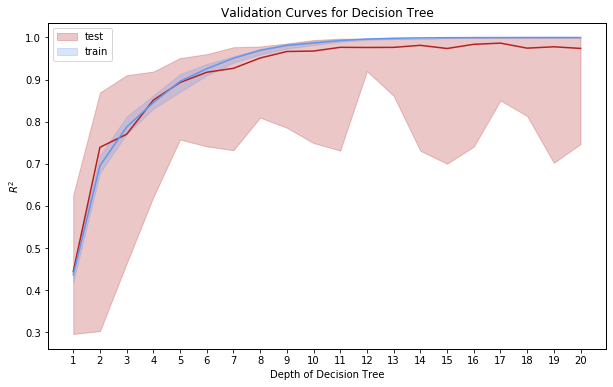

In [47]:
from sklearn.tree import DecisionTreeRegressor

# test a range of tree depths and create a validation curve
test_curve = []
train_curve = []
for k in range(1, 21):
    builder = DecisionTreeRegressor(max_depth=k)
    results = decisiontree_cross_validation(model, builder, data)
    test_curve.append(stats.mstats.mquantiles(results['test'], [0.025, 0.5, 0.975]))
    train_curve.append(stats.mstats.mquantiles(results['train'], [0.025, 0.5, 0.975]))

# visualize the results
xs = list(range(1, 21))
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.
axes = figure.add_subplot(1, 1, 1)

test_lower, test_mid, test_upper = zip(*test_curve)
train_lower, train_mid, train_upper = zip(*train_curve)

axes.fill_between(xs, test_lower, test_upper, alpha=0.25, color="firebrick", label="test")
axes.plot(xs, test_mid, color="firebrick")

axes.fill_between(xs, train_lower, train_upper, alpha=0.25, color="cornflowerblue", label="train")
axes.plot(xs, train_mid, color="cornflowerblue")

axes.set_xticks(xs)
axes.set_xticklabels([str(x) for x in xs])

axes.legend()
axes.set_title("Validation Curves for Decision Tree")
axes.set_xlabel("Depth of Decision Tree")
axes.set_ylabel("$R^2$")

plt.show()
plt.close()

#### Decision
Cross validation curve suggest depth = 13 show the best performance.

We also need to decide if we are overfitting the data. 
Now, let's plot a learning curve.


### Learning Curve

In [48]:
from collections import defaultdict

def data_collection():
    result = dict()
    result[ "train"] = defaultdict( list)
    result[ "test"] = defaultdict( list)
    return result

def decisiontree_learning_curves(builder, formula, data, fold_count=10, repetitions=3, increment=1):
    indices = list(range(len( data)))
    results = data_collection()
    for _ in range(repetitions):
        random.shuffle(indices)
        folds = chunk(indices, fold_count)
        for fold in folds:
            test_data = data.iloc[ fold]
            train_indices = [idx for idx in indices if idx not in fold]
            train_data = data.iloc[train_indices]
            for i in list(range(increment, 100, increment)) + [100]: # ensures 100% is always picked.
                # the indices are already shuffled so we only need to take ever increasing chunks
                train_chunk_size = int( np.ceil((i/100)*len( train_indices)))
                train_data_chunk = data.iloc[train_indices[0:train_chunk_size]]
                # we calculate the model
                y, X = patsy.dmatrices(formula, train_data_chunk, return_type="matrix")
                model = builder.fit(X, y)
                y_hat = model.predict(X)
                training_r_squared = (stats.pearsonr(y[:,0], y_hat)[0])**2
                results["train"][i].append(training_r_squared)
                
                # y, X for test data
                y, X = patsy.dmatrices(formula, test_data, return_type="matrix")
                y_hat = model.predict(X)
                test_r_squared = (stats.pearsonr(y[:,0], y_hat)[0])**2
                results["test"][i].append(test_r_squared)
    # process results
    statistics = {}
    for k, v in results["train"].items():
        statistics[ k] = (np.mean(v), np.std(v))
    results["train"] = statistics
    statistics = {}
    for k, v in results["test"].items():
        statistics[ k] = (np.mean(v), np.std(v))
    results["test"] = statistics
    return results

# plot a learning curve
builder = DecisionTreeRegressor(max_depth=13)
result = decisiontree_learning_curves(builder, model, data)
def results_to_curves( curve, results):
    all_statistics = results[ curve]
    keys = list( all_statistics.keys())
    keys.sort()
    mean = []
    upper = []
    lower = []
    for k in keys:
        m, s = all_statistics[ k]
        mean.append( m)
        upper.append( m + 2 * s)
        lower.append( m - 2 * s)
    return keys, lower, mean, upper

def plot_learning_curves( results, metric, zoom=False):
    figure = plt.figure(figsize=(10,6))

    axes = figure.add_subplot(1, 1, 1)

    xs, train_lower, train_mean, train_upper = results_to_curves( "train", results)
    _, test_lower, test_mean, test_upper = results_to_curves( "test", results)

    axes.plot( xs, train_mean, color="steelblue")
    axes.fill_between( xs, train_upper, train_lower, color="steelblue", alpha=0.25, label="train")
    axes.plot( xs, test_mean, color="firebrick")
    axes.fill_between( xs, test_upper, test_lower, color="firebrick", alpha=0.25, label="test")
    axes.legend()
    axes.set_xlabel( "training set (%)")
    axes.set_ylabel( metric)
    axes.set_title("Learning Curves")

    if zoom:
        y_lower = int( 0.9 * np.amin([train_lower[-1], test_lower[-1]]))
        y_upper = int( 1.1 * np.amax([train_upper[-1], test_upper[-1]]))
        axes.set_ylim((y_lower, y_upper))

    plt.show()
    plt.close()

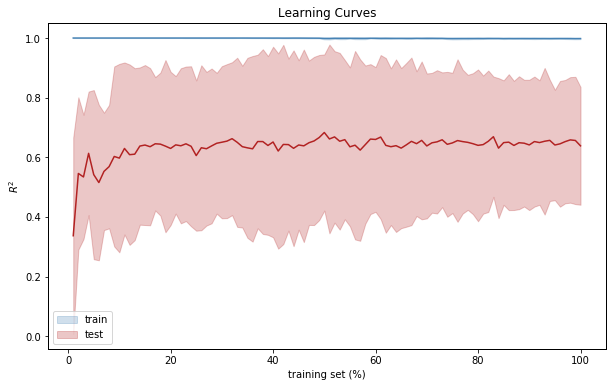

In [49]:
plot_learning_curves(result, "$R^2$")

#### Interpretation
The learning curve suggests taking > 10% of the data should be sufficient.

#### Creating ensemble of R2 estimates

In [50]:
DT_results = decisiontree_cross_validation(model, builder, data)
print(r"95% CI for R^2:", stats.mstats.mquantiles(DT_results['test'], [0.025, 0.975]))

95% CI for R^2: [0.77645148 0.99648919]


#### Interpretation
Results suggest the 95% confidence interval of R2 in the decision tree method is between 0.88 and 0.99.

## 3.5 K nearest neighbour

In [51]:
from sklearn.preprocessing import StandardScaler
import sklearn.neighbors as neighbors
import sklearn.linear_model as linear
import random
import patsy

In [57]:
columns = ['medv', 'black' , 'tax' , 'dis' , 'lstat_log' , 'ptratio' , 'rm'] 
scaler = StandardScaler()
data[columns] = scaler.fit_transform(data[columns])

In [58]:
def chunk(xs, n):
    k, m = divmod(len(xs), n)
    return [xs[i * k + min(i, m):(i + 1) * k + min(i + 1, m)] for i in range(n)]

def knn_cross_validation(formula, builder, data, fold_count=10, repetitions=3):
    indices = list(range(len( data)))
    metrics = {"train": [], "test": []}
    for _ in range(repetitions):
        random.shuffle(indices)
        folds = chunk(indices, fold_count)
        for fold in folds:
            test_data = data.iloc[fold]
            train_indices = [idx not in fold for idx in indices]
            train_data = data.iloc[train_indices]
            # y, X for training data
            y, X = patsy.dmatrices(formula, train_data, return_type="matrix")
            model = builder.fit(X, y)
            y_hat = model.predict(X)
            training_r_squared = (stats.pearsonr(y, y_hat)[0][0])**2
            metrics["train"].append(training_r_squared)
            # y, X for training data
            y, X = patsy.dmatrices(formula, test_data, return_type="matrix")
            y_hat = model.predict(X)
            test_r_squared = (stats.pearsonr(y, y_hat)[0][0])**2
            metrics["test"].append(test_r_squared)
    return metrics

def data_collection(test_curve, train_curve):
    xs = list(range(1, 21))
    figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.
    axes = figure.add_subplot(1, 1, 1)

    test_lower, test_mid, test_upper = zip(*test_curve)
    train_lower, train_mid, train_upper = zip(*train_curve)

    axes.fill_between(xs, test_lower, test_upper, alpha=0.25, color="firebrick", label="test")
    axes.plot(xs, test_mid, color="firebrick")

    axes.fill_between(xs, train_lower, train_upper, alpha=0.25, color="cornflowerblue", label="train")
    axes.plot(xs, train_mid, color="cornflowerblue")

    axes.set_xticks(xs)
    axes.set_xticklabels([str(x) for x in xs])

    axes.legend()
    axes.set_title("Validation Curves for kNN")
    axes.set_xlabel("k")
    axes.set_ylabel("$R^2$")

    plt.show()
    plt.close()
from collections import defaultdict
def create_data_collection():
    result = dict()
    result["train"] = defaultdict(list)
    result["test"]  = defaultdict(list)
    return result
def knn_learning_curves(builder, formula, data, fold_count=10, repetitions=3, increment=1):
    indices = list(range(len( data)))
    results = create_data_collection()
    for _ in range(repetitions):
        random.shuffle(indices)
        folds = chunk(indices, fold_count)
        for fold in folds:
            test_data = data.iloc[ fold]
            train_indices = [idx for idx in indices if idx not in fold]
            train_data = data.iloc[train_indices]
            for i in list(range(increment, 100, increment)) + [100]: # ensures 100% is always picked.
                # the indices are already shuffled so we only need to take ever increasing chunks
                train_chunk_size = int( np.ceil((i/100)*len( train_indices)))
                train_data_chunk = data.iloc[train_indices[0:train_chunk_size]]
                # we calculate the model
                y, X = patsy.dmatrices(formula, train_data_chunk, return_type="matrix")
                model = builder.fit(X, y)
                y_hat = model.predict(X)
                training_r_squared = (stats.pearsonr(y, y_hat)[0][0])**2
                results["train"][i].append(training_r_squared)
                
                # y, X for test data
                y, X = patsy.dmatrices(formula, test_data, return_type="matrix")
                y_hat = model.predict(X)
                test_r_squared = (stats.pearsonr(y, y_hat)[0][0])**2
                results["test"][i].append(test_r_squared)
    # process results
    # Rely on the CLT...
    statistics = {}
    for k, v in results["train"].items():
        statistics[ k] = (np.mean(v), np.std(v))
    results["train"] = statistics
    statistics = {}
    for k, v in results["test"].items():
        statistics[ k] = (np.mean(v), np.std(v))
    results["test"] = statistics
    return results
#
def results_to_curves( curve, results):
    all_statistics = results[ curve]
    keys = list( all_statistics.keys())
    keys.sort()
    mean = []
    upper = []
    lower = []
    for k in keys:
        m, s = all_statistics[ k]
        mean.append( m)
        upper.append( m + 2 * s)
        lower.append( m - 2 * s)
    return keys, lower, mean, upper
def plot_learning_curves( results, metric, zoom=False):
    figure = plt.figure(figsize=(10,6))

    axes = figure.add_subplot(1, 1, 1)

    xs, train_lower, train_mean, train_upper = results_to_curves( "train", results)
    _, test_lower, test_mean, test_upper = results_to_curves( "test", results)

    axes.plot( xs, train_mean, color="steelblue")
    axes.fill_between( xs, train_upper, train_lower, color="steelblue", alpha=0.25, label="train")
    axes.plot( xs, test_mean, color="firebrick")
    axes.fill_between( xs, test_upper, test_lower, color="firebrick", alpha=0.25, label="test")
    axes.legend()
    axes.set_xlabel( "training set (%)")
    axes.set_ylabel( metric)
    axes.set_title("Learning Curves")

    if zoom:
        y_lower = int( 0.9 * np.amin([train_lower[-1], test_lower[-1]]))
        y_upper = int( 1.1 * np.amax([train_upper[-1], test_upper[-1]]))
        axes.set_ylim((y_lower, y_upper))

    plt.show()
    plt.close()

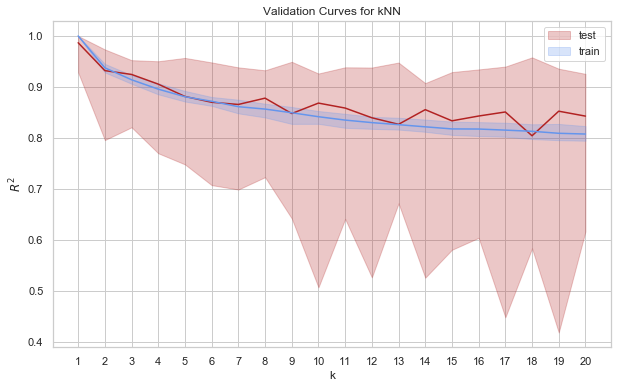

In [63]:
formula = "medv ~ black + tax + dis + lstat_log + ptratio + rm"

test_curve = []
train_curve = []
for k in range(1, 21):
    builder = neighbors.KNeighborsRegressor(k)
    results = knn_cross_validation(formula, builder, data)
    test_curve.append(stats.mstats.mquantiles(results['test'], [0.025, 0.5, 0.975]))
    train_curve.append(stats.mstats.mquantiles(results['train'], [0.025, 0.5, 0.975]))
data_collection(test_curve, train_curve)

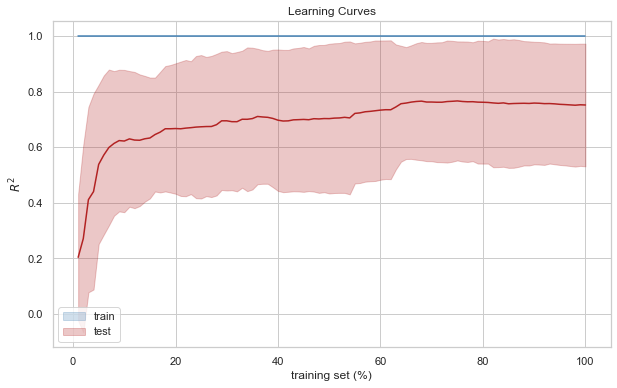

In [64]:
result = knn_learning_curves(neighbors.KNeighborsRegressor(1), formula, data)
plot_learning_curves(result, "$R^2$")

**Creating ensemble of R2 estimates**

In [66]:
builder = neighbors.KNeighborsRegressor(1)
knn_results = knn_cross_validation(formula, builder, data)
print(r"95% CI for R^2:", stats.mstats.mquantiles(knn_results['test'], [0.025, 0.975]))

95% CI for R^2: [0.66825749 0.9997024 ]


**Interpretation**

Results suggest the 95% confidence interval of R2 in the decision tree method is between 0.67 and 0.99.

## 3.6 Model evaluation using Bayesian inference

In this section, we will evaluate the overall performance of the four models considered.

#### Histograms of R2

In [68]:
def bootstrap_sample( data, f, n=100):
    result = []
    m = len( data)
    for _ in range( n):
        sample = np.random.choice( data, len(data), replace=True)
        r = f( sample)
        result.append( r)
    return np.array( result)

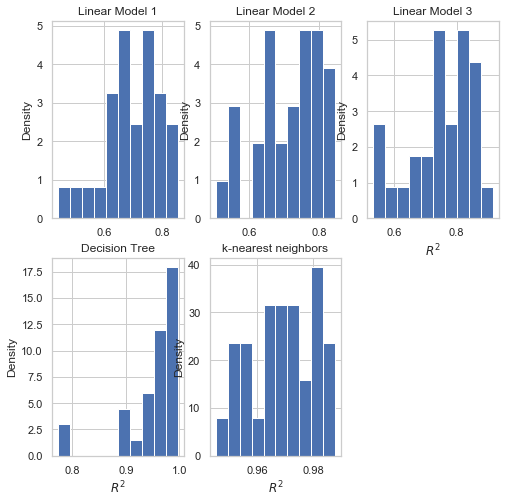

In [79]:
lr1_r2 = [r[1] for r in lr_result_1]
lr2_r2 = [r[1] for r in lr_result_2]
lr3_r2 = [r[1] for r in lr_result_3]
dt_r2 = DT_results['test']
knn_bootstrap = bootstrap_sample(knn_results['test'], np.mean,30)

sns.set(style="whitegrid")
# visualize result
figure = plt.figure(figsize=(8, 8)) # first element is width, second is height.

axes = figure.add_subplot(2, 3, 1)
axes.hist(lr1_r2, density=True)
axes.set_ylabel( "Density")
axes.set_title( "Linear Model 1")

axes = figure.add_subplot(2,3, 2)
axes.hist(lr2_r2, density=True)
axes.set_ylabel( "Density")
axes.set_title( "Linear Model 2")

axes = figure.add_subplot(2,3, 3)
axes.hist( lr3_r2, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$R^2$")
axes.set_title( "Linear Model 3")

axes = figure.add_subplot(2,3, 4)
axes.hist( dt_r2, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$R^2$")
axes.set_title( "Decision Tree")

axes = figure.add_subplot(2,3, 5)
axes.hist( knn_bootstrap, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$R^2$")
axes.set_title( "k-nearest neighbors")


plt.show()
plt.close()

#### Interpretation
Results suggest R2 from the 1st linear model centered around 0.7, whereas linear model 2 is centered around 0.8. Linear Model 3 seems to have a highr R2 compared to the other 2 linear models. But the R2 in knn regression method show likely the highest R2.

Let's look at this more quantitatively.


### Look at the differences

#### (1) Compare linear models 1 and 2

In [54]:
diff1 = np.array(lr2_r2) - np.array(lr1_r2)
print("P(LR2 > LR1)", np.mean(diff1 > 0))

P(LR2 > LR1) 0.5


Statistically, the chance that Linear Model 2 performs better than Linear Model 1 is only 57%.

#### (2) Compare linear model 3 with linear models 1 and 2

In [55]:
diff2a = np.array(lr3_r2) - np.array(lr1_r2)
print("P(LR3 > LR1)", np.mean(diff2a > 0))
diff2b = np.array(lr3_r2) - np.array(lr2_r2)
print("P(LR3 > LR2)", np.mean(diff2b > 0))

P(LR3 > LR1) 0.8
P(LR3 > LR2) 0.7


From the results above, they suggest the probability that linear model 3 performs bettter than models 1 and 2 is only 0.53 - 0.63. 

#### (3) Compare decision tree model with linear models

In [56]:
diff3a = np.array(dt_r2) - np.array(lr1_r2)
print("P(DT > LR1)", np.mean(diff3a > 0))
diff3b = np.array(dt_r2) - np.array(lr2_r2)
print("P(DT > LR2)", np.mean(diff3b > 0))
diff3c = np.array(dt_r2) - np.array(lr3_r2)
print("P(DT > LR3)", np.mean(diff3c > 0))

P(DT > LR1) 0.9666666666666667
P(DT > LR2) 0.9666666666666667
P(DT > LR3) 0.9666666666666667


**(4) Compare K nearest neighbour model with linear models**

In [86]:
diff3a = np.array(knn_bootstrap) - np.array(lr1_r2)
print("P(KNN > LR1)", np.mean(diff3a > 0))
diff3b = np.array(knn_bootstrap) - np.array(lr2_r2)
print("P(KNN > LR2)", np.mean(diff3b > 0))
diff3c = np.array(knn_bootstrap) - np.array(lr3_r2)
print("P(KNN > LR3)", np.mean(diff3c > 0))
diff4c = np.array(knn_bootstrap) - np.array(dt_r2)
print("P(KNN > dt_r2)", np.mean(diff4c > 0))

P(DT > LR1) 1.0
P(DT > LR2) 1.0
P(DT > LR3) 1.0
P(DT > dt_r2) 0.5333333333333333


Results suggest the K nearest regression is much better than the performance of the three linear models we considered and comparable with the performance of the decision tree regression.

# 4. Conclusions

In this project, we selected the Boston housing dataset for our analysis and modeling. We conducted detailed EDA for individual variables and correlation analyses among any two variables.

From the EDA analysis, we constructed three linear model, one decision tree model, and one KNN model. We found that there was 80% of chance that the third linear model may perform slightly better than the other two linear models. But, the decision tree and KNN models are much better than any of the three linear models.